In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
train = pd.read_csv(os.path.join('train.csv'))
test = pd.read_csv(os.path.join('test.csv'))
ss = pd.read_csv(os.path.join('Sample_submission.csv'))

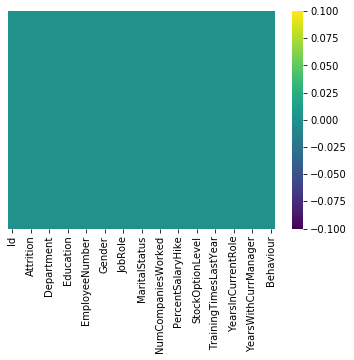

In [11]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
for i in train.columns:
    if train[i].dtype == np.object:
        train[i]=le.fit_transform(train[i])

for i in test.columns:
    if test[i].dtype == np.object:
        test[i]=le.fit_transform(test[i])

In [14]:
train.drop(['Id', 'Behaviour'], axis=1, inplace=True)
test.drop(['Id', 'Behaviour'], axis=1, inplace=True)

In [15]:
"""correlation = train.corr().round(2)
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)"""

'correlation = train.corr().round(2)\nfig, ax = plt.subplots(figsize=(18,18))\nsns.heatmap(correlation, annot=True, linewidths=.5, ax=ax)'

In [16]:
X_train = train.drop('Attrition', axis=1)
y_train = train.Attrition

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [18]:
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
y_train_rf = RF.predict_proba(X_train)
rf_score = roc_auc_score(y_train, y_train_rf[:,1])
rf_score

1.0

In [22]:
y_predict = RF.predict_proba(test)
y_predict

array([[0.89, 0.11],
       [0.9 , 0.1 ],
       [0.88, 0.12],
       [0.76, 0.24],
       [0.94, 0.06],
       [0.93, 0.07],
       [0.34, 0.66],
       [0.85, 0.15],
       [0.77, 0.23],
       [0.88, 0.12],
       [0.91, 0.09],
       [0.74, 0.26],
       [0.86, 0.14],
       [0.94, 0.06],
       [0.95, 0.05],
       [0.95, 0.05],
       [0.53, 0.47],
       [0.9 , 0.1 ],
       [0.89, 0.11],
       [1.  , 0.  ],
       [0.93, 0.07],
       [0.55, 0.45],
       [0.9 , 0.1 ],
       [0.9 , 0.1 ],
       [0.9 , 0.1 ],
       [0.97, 0.03],
       [0.93, 0.07],
       [0.97, 0.03],
       [0.27, 0.73],
       [0.91, 0.09],
       [0.91, 0.09],
       [0.94, 0.06],
       [0.72, 0.28],
       [0.79, 0.21],
       [0.97, 0.03],
       [0.94, 0.06],
       [0.82, 0.18],
       [0.87, 0.13],
       [0.82, 0.18],
       [0.85, 0.15],
       [0.41, 0.59],
       [0.81, 0.19],
       [0.96, 0.04],
       [0.95, 0.05],
       [0.94, 0.06],
       [0.9 , 0.1 ],
       [0.74, 0.26],
       [0.83,

In [21]:
ss=ss.drop('Attrition',axis=1)
ss['Attrition']=y_predict[:,1]
ss.to_csv('submission_rf.csv',index=False)